In [1]:
#get the data overview
import pandas as pd

data = "Track_wear_m06_spot_turn.xlsx"

df = pd.read_excel(data) 
df.head()

,Zeit -,n_sprocket_left - U/min,x_sprocket_left - mm,torque_travel_left - Nm,torque_travel_right - Nm,p_track_tension_left - bar,p_track_tension_right - bar
0,0.000000,0.000034,0.000000,1.321088,0.250282,39.281631,52.370979
1,0.000833,0.000034,0.000003,1.382598,0.224518,39.274406,52.369591
2,0.001667,0.000034,0.000005,1.266326,0.267108,39.260303,52.369404
3,0.002500,0.000034,0.000008,1.197580,0.344828,39.264931,52.369606
4,0.003333,0.000034,0.000011,1.277175,0.299051,39.273117,52.369202


In [2]:
#Data Normalization
norm_df = df
def normalize(norm_df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

norm_df = normalize(norm_df)

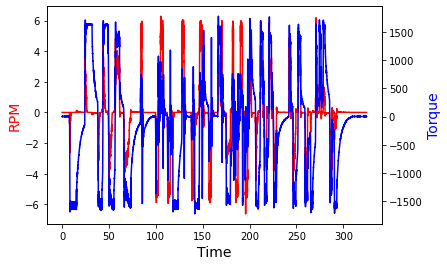

In [3]:
#premilinary view of data with subplot (aline both graph)
import matplotlib.pyplot as pt

#overall plot
y_rpm = df["n_sprocket_left - U/min"]
y_torque = df["torque_travel_left - Nm"]
x = df["Zeit - "]

# create figure and axis objects with subplots()
fig,ax = pt.subplots()
# make a plot
ax.plot(x,
        y_rpm,
        color="red")
# set x-axis label
ax.set_xlabel("Time", fontsize = 14)
# set y-axis label
ax.set_ylabel("RPM",
              color="red",
              fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(x, y_torque ,color="blue")
ax2.set_ylabel("Torque",color="blue",fontsize=14)
pt.show()

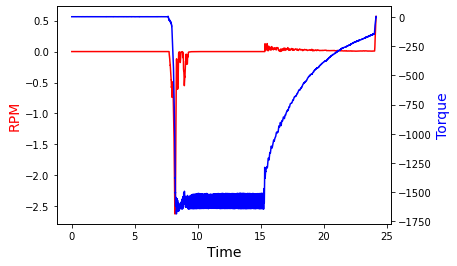

In [4]:
#get desired data range
n = 29000 #length of one gap 29000

x1 = x[0:n]
y1_rpm = y_rpm[0:n]
y1_torque = y_torque[0:n]

# create figure and axis objects with subplots()
fig,ax = pt.subplots()
# make a plot
ax.plot(x1,
        y1_rpm,
        color="red")
# set x-axis label
ax.set_xlabel("Time", fontsize = 14)
# set y-axis label
ax.set_ylabel("RPM",
              color="red",
              fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(x1, y1_torque ,color="blue")
ax2.set_ylabel("Torque",color="blue",fontsize=14)
pt.show()

In [ ]:
import numpy as np

def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth
